# Tree Classification

In [ ]:
import urllib

# urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv', '/work/Labs/lab5/data.csv')

In [ ]:
import pandas as pd

data = pd.read_csv('./data.csv')

In [ ]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
((data['Classes  '].dtype) == 'O')

True

In [ ]:
for i in data.columns:
    print(i)
    k = str(i)
    k = k.strip()
    if ((data[i].dtype) == 'O'):
        data[k] = data[i].str.strip()
    if k!=i:
        data.drop([i], axis=1, inplace=True)

day
month
year
Temperature
 RH
 Ws
Rain 
FFMC
DMC
DC
ISI
BUI
FWI
Classes  


In [ ]:
data['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [ ]:
data[data['Classes'] == 'Classes']

,day,month,year,Temperature,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [ ]:
data = data.dropna()

In [ ]:
data[data['Classes'].notnull()]

,day,month,year,Temperature,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
data['DC'] = data['DC'].astype('float64')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['FWI'] = data['FWI'].astype('float64')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# checking DC
for i in data['FWI']:
    try:
        k = float(i)

    except Exception as e:
        print(i, e)

In [ ]:
data

,day,month,year,Temperature,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
data = data.drop(['year'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

data['Classes'] = LabelEncoder().fit_transform(data['Classes'])
data

,day,month,Temperature,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,85.4,16.0,44.5,4.5,16.9,6.5,0
240,27,9,28,41.1,6.5,8.0,0.1,6.2,0.0,1
241,28,9,27,45.9,3.5,7.9,0.4,3.4,0.2,1
242,29,9,24,79.7,4.3,15.2,1.7,5.1,0.7,1


<AxesSubplot:>

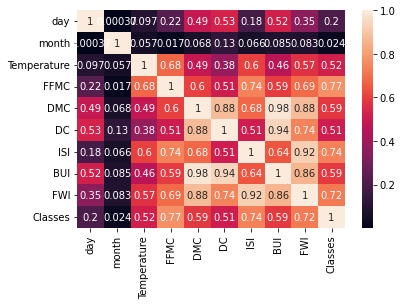

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr().abs(), annot=True)

In [ ]:
x = data.drop(['Classes'], axis=1)
y = data['Classes']
x

,day,month,Temperature,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...
239,26,9,30,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,28,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9,27,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,24,79.7,4.3,15.2,1.7,5.1,0.7


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)
clf.fit(x, y)
clf.feature_importances_

array([0.        , 0.01852608, 0.        , 0.93496588, 0.00836662,
       0.        , 0.03814143, 0.        , 0.        ])

In [ ]:
from sklearn.model_selection import train_test_split

x_ta, x_te, y_ta, y_te = train_test_split(x[['FFMC']], y, test_size=0.3, random_state=1)

In [ ]:
x_ta

,FFMC
95,68.4
59,85.4
102,58.5
147,87.8
223,59.5
...,...
137,47.4
72,81.3
140,64.6
236,89.0


In [ ]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_ta, y_ta)

DecisionTreeClassifier(random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = clf.predict(x_ta)

confusion_matrix(y_ta, y_pred)

array([[98,  0],
       [ 0, 72]])

In [ ]:
y_pred = clf.predict(x_te)

confusion_matrix(y_te, y_pred)

array([[39,  0],
       [ 1, 33]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5ba1956-2aa0-49ed-9952-f1c7a30328f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>